<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/ML_cnn_65_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Required Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

# Importing required libraries
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

from keras.layers import Embedding

from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Model
from keras import regularizers

# gensim
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [62]:

    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:

stop_words =  set(open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bd_stopword.txt').read().split())
stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(text):
    return stop_words.sub(" ", text)

def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)

def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Za-z0-9]', flags=re.I)
    return pattern.sub(r'', text)

In [64]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/Hostility_dataset - Hostility_Dataset_main_suffeld.csv")
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1
10534,629,হ্লার পৌ হ্লা,1,0,1,0,0,0
10535,2913,NaN,1,1,0,1,0,0


In [65]:
  # Clean the text
# df['Text'] = df.Text.apply(lambda x : cleantxt(x))

df['Text'] = df['Text'].astype(str)
data_raw = df 
data_raw['Text'] = data_raw['Text'].apply(removeStopWords)
data_raw['Text'] = data_raw['Text'].apply(rem_emoticons)
data_raw['Text'] = data_raw['Text'].apply(rem_special_characters)
data_raw['Text'] = data_raw['Text'].apply(rem_non_bangla_characters)
df = data_raw

# separate explanatory and dependent variables


In [66]:
X = df.iloc[:,1]
y = df.iloc[:,2:]

In [67]:
y


,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,1,1,0,0,0
1,0,0,0,0,0,0
2,1,1,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
10532,1,1,0,0,0,1
10533,1,1,0,0,0,1
10534,1,0,1,0,0,0
10535,1,1,0,1,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [69]:
X_train    

6179     দারুন  পেতে যাচ্ছি ️ অভিনন্দন রইলো মুভিটার  য ️️️
59          ১০০ সেলুট পাওয়ার দাবীদার সুন্দর কথাগুলো গুছানো
6708                 র বেয়াদব  শয়তান ছেলেটা বড়   আওয়ামি হয়
68                              ১৫ বছর  লুটে পুটে খাইছে   
10304                  হালা পুটকির পো পুটকি বলদ মার্কা পিক
                               ...                        
9785     সাউথে  প্রসান্ত নীলরাজা মৌলী   আমাদেরও  রায়হান...
7763     ভদ্রতা কাহা  ওনা দেখলে  অনুসরণ     প্রিয় মানুষ...
5218     জামাতের মি  পুলিশের সন্ত্রাসী হামলা পুলিশ বর্ত...
1346      চা  খুনের বিচার এইভাবে করুক  দেশে সরকার  হইতো...
3582                                      ঔ মাগির ফাসি চাই
Name: Text, Length: 6322, dtype: object

# Implementation of CNN and RNN using word embeddings using word2vec and GloVe for Multi-Label text classification


## 1. Loading Data

In [70]:
print(X_test)

1479                              ভারত টা ছাড়লে তোরা  শেষ 
6486     নবি দিবসের নামে ইসলামের ইতিহা পা    গুলো  কোথা...
10366     হালাল জিনিস  মাণে অল্প  তৃপ্তিকর  আল্লাহ খুশী   
9328     শাওয়া মারানি পাশের লোকটা  গালি খাওয়ানোর  য ফ্র...
5139                  জয় ওলেখক সাহেব হুজুরদের   চুল কানি  
                               ...                        
5830     তো সামনে পেলে শালী চুদে তোর গাড় ফাটিয়ে দিবো রে...
9362     শালা  লাদেশি হিনদুরা  তোর মায়ের গোয়া মারছে    ...
6295                      মনে   পোলি রোগে আক্রান্ত হয়েছেন
8714                 মুসমানরা   যেটা   ভালো     মিথ্ কথা  
5925      ভালবাসার ভেলায়   ভাসতে      ডুবতে পারছি   কথ...
Name: Text, Length: 2107, dtype: object


### 2. Tokenize text of the training data with keras text preprocessing functions ###

In [71]:
# Adding list of Bad words to tokanizer
# bad_words = pd.read_csv("../input/bad-words/bad_words.csv")
bad_words =  list(['word'])

In [72]:
print(X_train)

6179     দারুন  পেতে যাচ্ছি ️ অভিনন্দন রইলো মুভিটার  য ️️️
59          ১০০ সেলুট পাওয়ার দাবীদার সুন্দর কথাগুলো গুছানো
6708                 র বেয়াদব  শয়তান ছেলেটা বড়   আওয়ামি হয়
68                              ১৫ বছর  লুটে পুটে খাইছে   
10304                  হালা পুটকির পো পুটকি বলদ মার্কা পিক
                               ...                        
9785     সাউথে  প্রসান্ত নীলরাজা মৌলী   আমাদেরও  রায়হান...
7763     ভদ্রতা কাহা  ওনা দেখলে  অনুসরণ     প্রিয় মানুষ...
5218     জামাতের মি  পুলিশের সন্ত্রাসী হামলা পুলিশ বর্ত...
1346      চা  খুনের বিচার এইভাবে করুক  দেশে সরকার  হইতো...
3582                                      ঔ মাগির ফাসি চাই
Name: Text, Length: 6322, dtype: object


In [73]:
# Set Maximum number of words to be embedded
NUM_WORDS = 30000

# Define/Load Tokenize text function
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)

# Fit the function on the text

tokenizer.fit_on_texts(X_train)

# Count number of unique tokens
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15255 unique tokens.


In [74]:
# Find top words/tokens by frequency
# [pair[0] for pair in sorted(tokenizer.word_counts.items(), key=lambda item: item[1])]

In [75]:
# size of bad words
num_badwords = len(bad_words)
num_badwords

1

In [76]:
n = 0
temp_bw = bad_words
for word, i in word_index.items():
    if word in bad_words:
        temp_bw.remove(word)
        n = n+1
    if i > (NUM_WORDS-num_badwords+n):
        for bw in temp_bw:
            tokenizer.word_index[bw] = i
            i=i+1
        break           

In [77]:
# Convert train and val to sequence
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid=tokenizer.texts_to_sequences(X_val)

In [78]:
from keras.utils import pad_sequences
X_train = pad_sequences(sequences_train,maxlen=100)
X_val = pad_sequences(sequences_valid,maxlen=100)

# Convert target to array
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

# Printing shape
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (6322, 100) (2108, 100)
Shape of label train and validation tensor: (6322, 6) (2108, 6)


# word embedding

In [79]:
word_vectors = dict()

# load the whole embedding into memory
f = open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bn_glove.39M.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_vectors[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(word_vectors))

Loaded 178153 word vectors.


In [80]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,(NUM_WORDS))

embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))


for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)
        if word in bad_words:
            vec = word_vectors['']
        embedding_matrix[i]=vec

del(word_vectors)

In [81]:
# Dfine Embedding function using the embedding_matrix
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

In [82]:
del(embedding_matrix)

# Build network and train it untill validation loss reduces (EarlyStopping)

In [91]:
sequence_length = X_train.shape[1]
filter_sizes = [3,4]
num_filters = 100
drop = 0.4

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((2*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
conc = Dense(64)(dropout)
output = Dense(units=6, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(conc)

# this creates a model that includes
model = Model(inputs, output)

In [92]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     4576800     ['input_2[0][0]']                
                                                                                                  
 reshape_2 (Reshape)            (None, 100, 300, 1)  0           ['embedding[1][0]']              
                                                                                                  
 conv2d_2 (Conv2D)              (None, 98, 1, 100)   90100       ['reshape_2[0][0]']              
                                                                                            

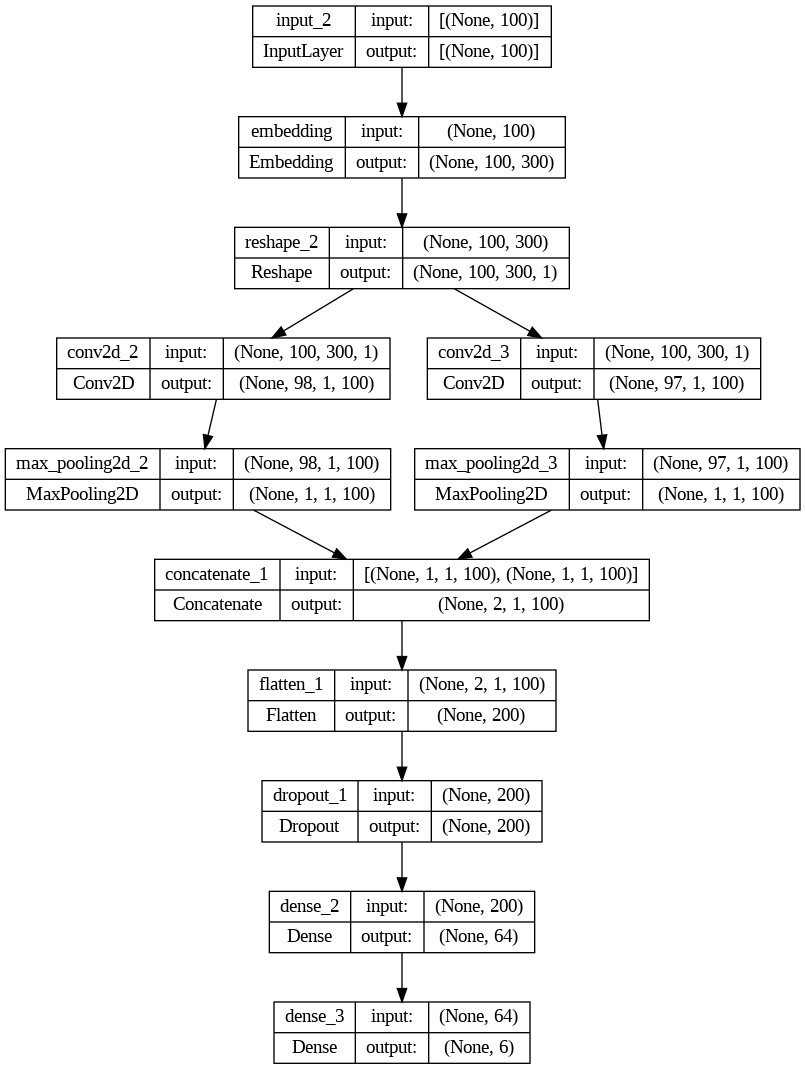

In [93]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [94]:
# Compiling Model using optimizer
# opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_accuracy'), EarlyStopping(patience= 10), ModelCheckpoint(filepath='/content/model-CNN-glove.h5', save_best_only=True)]
# hist_adam = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_val, y_val),callbacks=callbacks)
  # starts training

In [95]:
hist=     model.fit(X_train, y_train,batch_size= 128, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)  



Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.6315 - acc: 0.9288

50/50 [==============================] - 67s 502ms/step - loss: 0.6315 - acc: 0.9288 - val_loss: 0.5636 - val_acc: 0.9435
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.5381 - acc: 0.9209

50/50 [==============================] - 8s 173ms/step - loss: 0.5381 - acc: 0.9209 - val_loss: 0.5265 - val_acc: 0.8681
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.4935 - acc: 0.8872

50/50 [==============================] - 8s 150ms/step - loss: 0.4935 - acc: 0.8872 - val_loss: 0.5007 - val_acc: 0.8771
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.4565 - acc: 0.8363

50/50 [==============================] - 7s 138ms/step - loss: 0.4565 - acc: 0.8363 - val_loss: 0.4867 - val_acc: 0.8463
Epoch 5/10
50/50 [==============================] - ETA: 0s - loss: 0.4309 - acc: 0.8164

50/50 [==============================] - 6s 117ms/step - loss: 0.4309 - acc: 0.8164 - val_loss: 0.4813 - val_acc: 0.8041
Epoch 6/10
50/50 [==============================] - ETA: 0s - loss: 0.4088 - acc: 0.7969

50/50 [==============================] - 5s 101ms/step - loss: 0.4088 - acc: 0.7969 - val_loss: 0.4849 - val_acc: 0.7951
Epoch 7/10
50/50 [==============================] - ETA: 0s - loss: 0.3858 - acc: 0.7800

50/50 [==============================] - 3s 59ms/step - loss: 0.3858 - acc: 0.7800 - val_loss: 0.4892 - val_acc: 0.8131
Epoch 8/10
50/50 [==============================] - ETA: 0s - loss: 0.3700 - acc: 0.7705

50/50 [==============================] - 3s 69ms/step - loss: 0.3700 - acc: 0.7705 - val_loss: 0.5020 - val_acc: 0.7984
Epoch 9/10
50/50 [==============================] - ETA: 0s - loss: 0.3535 - acc: 0.7621

50/50 [==============================] - 3s 49ms/step - loss: 0.3535 - acc: 0.7621 - val_loss: 0.5189 - val_acc: 0.7979
Epoch 10/10
50/50 [==============================] - ETA: 0s - loss: 0.3389 - acc: 0.7599

50/50 [==============================] - 3s 54ms/step - loss: 0.3389 - acc: 0.7599 - val_loss: 0.5325 - val_acc: 0.7789


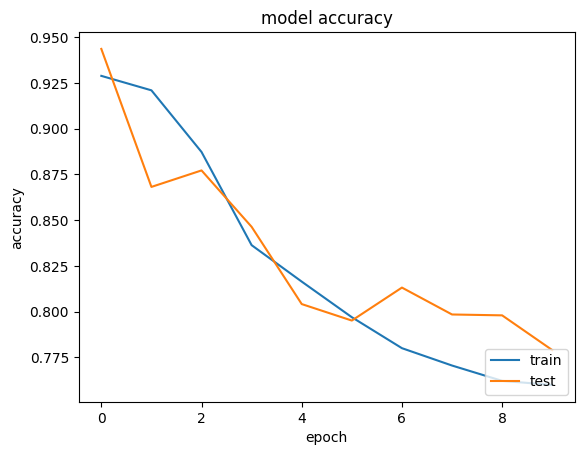

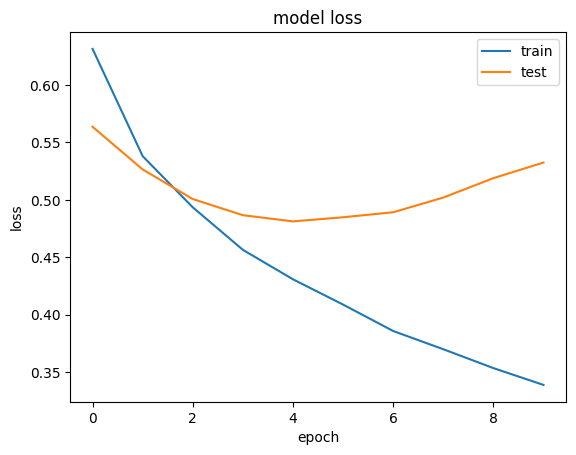

In [96]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

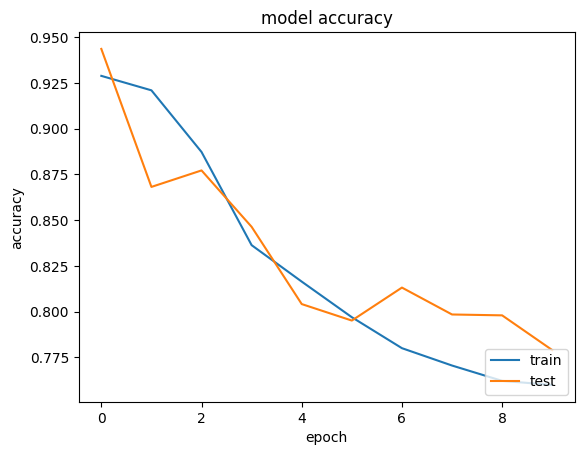

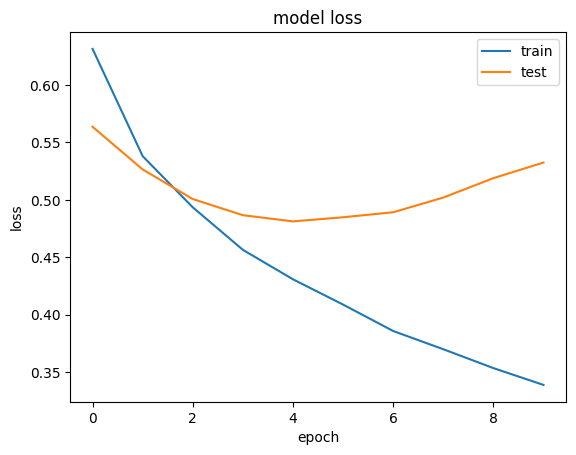

In [97]:
#copy
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [98]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [99]:
# Creating empty prediction array
col = ["ReAG", "PoAG", "VeAG", "GeAG", "Racism"]

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

66/66 [==============================] - 0s 3ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [100]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

<ipython-input-100-0bf6ad0b081c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
from sklearn.metrics import multilabel_confusion_matrix
vis_arr = multilabel_confusion_matrix(y_test, YPred)
vis_arr

array([[[ 501,  115],
        [ 107, 1384]],

       [[1208,  212],
        [ 211,  476]],

       [[1516,  101],
        [ 360,  130]],

       [[1782,   30],
        [ 247,   48]],

       [[1567,   76],
        [ 380,   84]],

       [[1652,   30],
        [ 399,   26]]])

In [102]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.92328219 0.69186047 0.56277056 0.61538462 0.525      0.46428571]
[0.92823608 0.69286754 0.26530612 0.16271186 0.18103448 0.06117647]
[0.92575251 0.69236364 0.36061026 0.25737265 0.26923077 0.10810811]


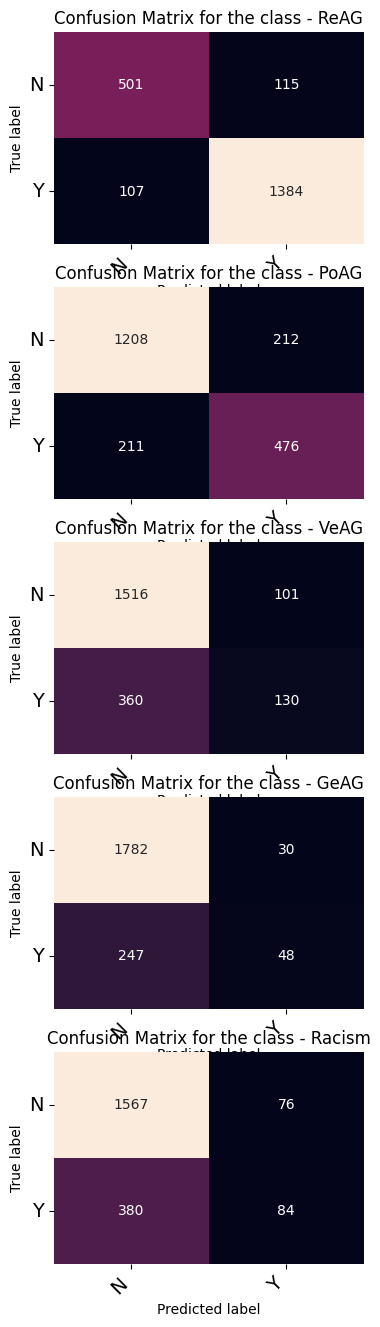

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["ReAG", "PoAG", "VeAG", "GeAG", "Racism"]

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

fig, ax = plt.subplots(5, 1, figsize=(4, 16))    
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])

# fig.tight_layout()
plt.show()


In [105]:
from sklearn.metrics import classification_report
import numpy as np

labels =["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.92      0.93      0.93      1491
          offensive       0.69      0.69      0.69       687
        Hate speech       0.56      0.27      0.36       490
             threat       0.62      0.16      0.26       295
         defamation       0.53      0.18      0.27       464
            sarcasm       0.46      0.06      0.11       425

          micro avg       0.79      0.56      0.65      3852
          macro avg       0.63      0.38      0.44      3852
       weighted avg       0.71      0.56      0.59      3852
        samples avg       0.58      0.40      0.45      3852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.92      0.93      0.93      1491
          offensive       0.69      0.69      0.69       687
        Hate speech       0.56      0.27      0.36       490
             threat       0.62      0.16      0.26       295
         defamation       0.53      0.18      0.27       464
            sarcasm       0.46      0.06      0.11       425

          micro avg       0.79      0.56      0.65      3852
          macro avg       0.63      0.38      0.44      3852
       weighted avg       0.71      0.56      0.59      3852
        samples avg       0.58      0.40      0.45      3852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# save model



In [107]:
model.save('/content/drive/MyDrive/Thesis (Omar Sharif sir)/Final dataset/saved_models/Models/cnn+glove.h5')


In [108]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Thesis (Omar Sharif sir)/Final dataset/saved_models/Models/cnn+glove.h5')

# **Confusion matrix**

In [109]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

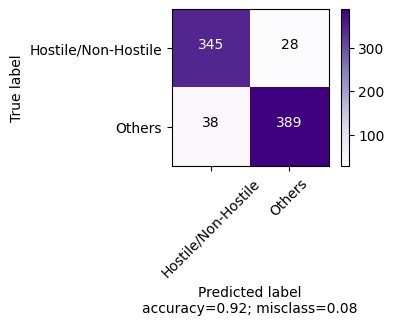

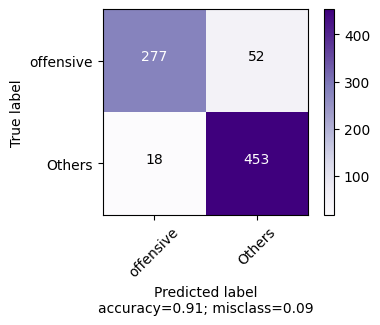

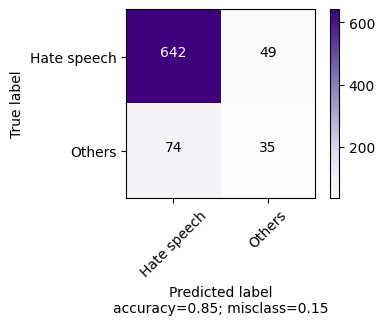

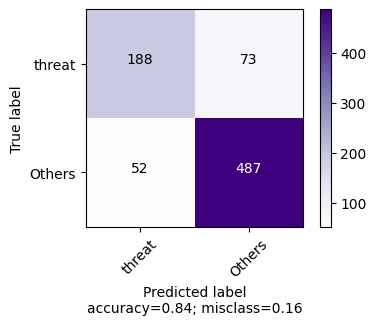

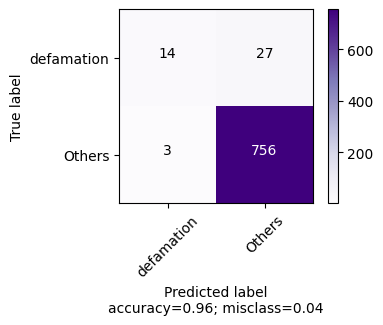

In [110]:
labels = ["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]
conf_mat = [[
        [345,  28],
        [ 38, 389]],

       [[277,  52],
        [ 18, 453]],

       [[ 642,  49],
        [ 74, 35]],

       [[188,  73],
        [ 52, 487]],

       [[14,  27],
        [ 3,  756]]]

for i in range(5):
    plot_confusion_matrix(cm  = np.array(conf_mat[i]), 
                      normalize    = False,
                      target_names = [labels[i], 'Others'],
                      title        = "")